In [1]:
from algorithms.root_to_liveql import root_to_liveql
from eflint.eflint_lib import EF
from eflint.eflint_parser import get_node_to_type_map, create_graph
from eflint.save_and_open import save_dsl_to_file, open_liveql
from graph_visualizer import visualize_graph

In [2]:
ef = EF()
type_res = ef.types()
type_res

{'types': {'[AOW leeftijd behaald]': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'Products', 'vars': []},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  '[Aanvrager woonachtig in Utrecht]': {'closed': True,
   'conditions': [],
   'derivation': [{'derivation-type': 'HoldsWhen',
     'term': {'t': {'domID': '[Woonplaats]',
       't': {'string': 'Utrecht', 'term-type': 'StringLit'},
       'term-type': 'Tag'},
      'term-type': 'Present'}}],
   'domain': {'domain-type': 'Products', 'vars': []},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'fact': {'actor': False, 'invariant': False},
    'kind-type': 'Fact'}},
  '[Alleenstaande]': {'closed': True,
   'conditions': [],
   'derivation': [],
   'domain': {'domain-type': 'Products', 'vars': []},
   'domain_constraint': {'b': True, 'term-type': 'BoolLit'},
   'kind': {'f

# What do they mean?
These are Dutch income supplement system. There are two versions, with and without kids.
- [Recht op IIT 51] -> Single with kids
- [Recht op IIT 231] -> Single no kids

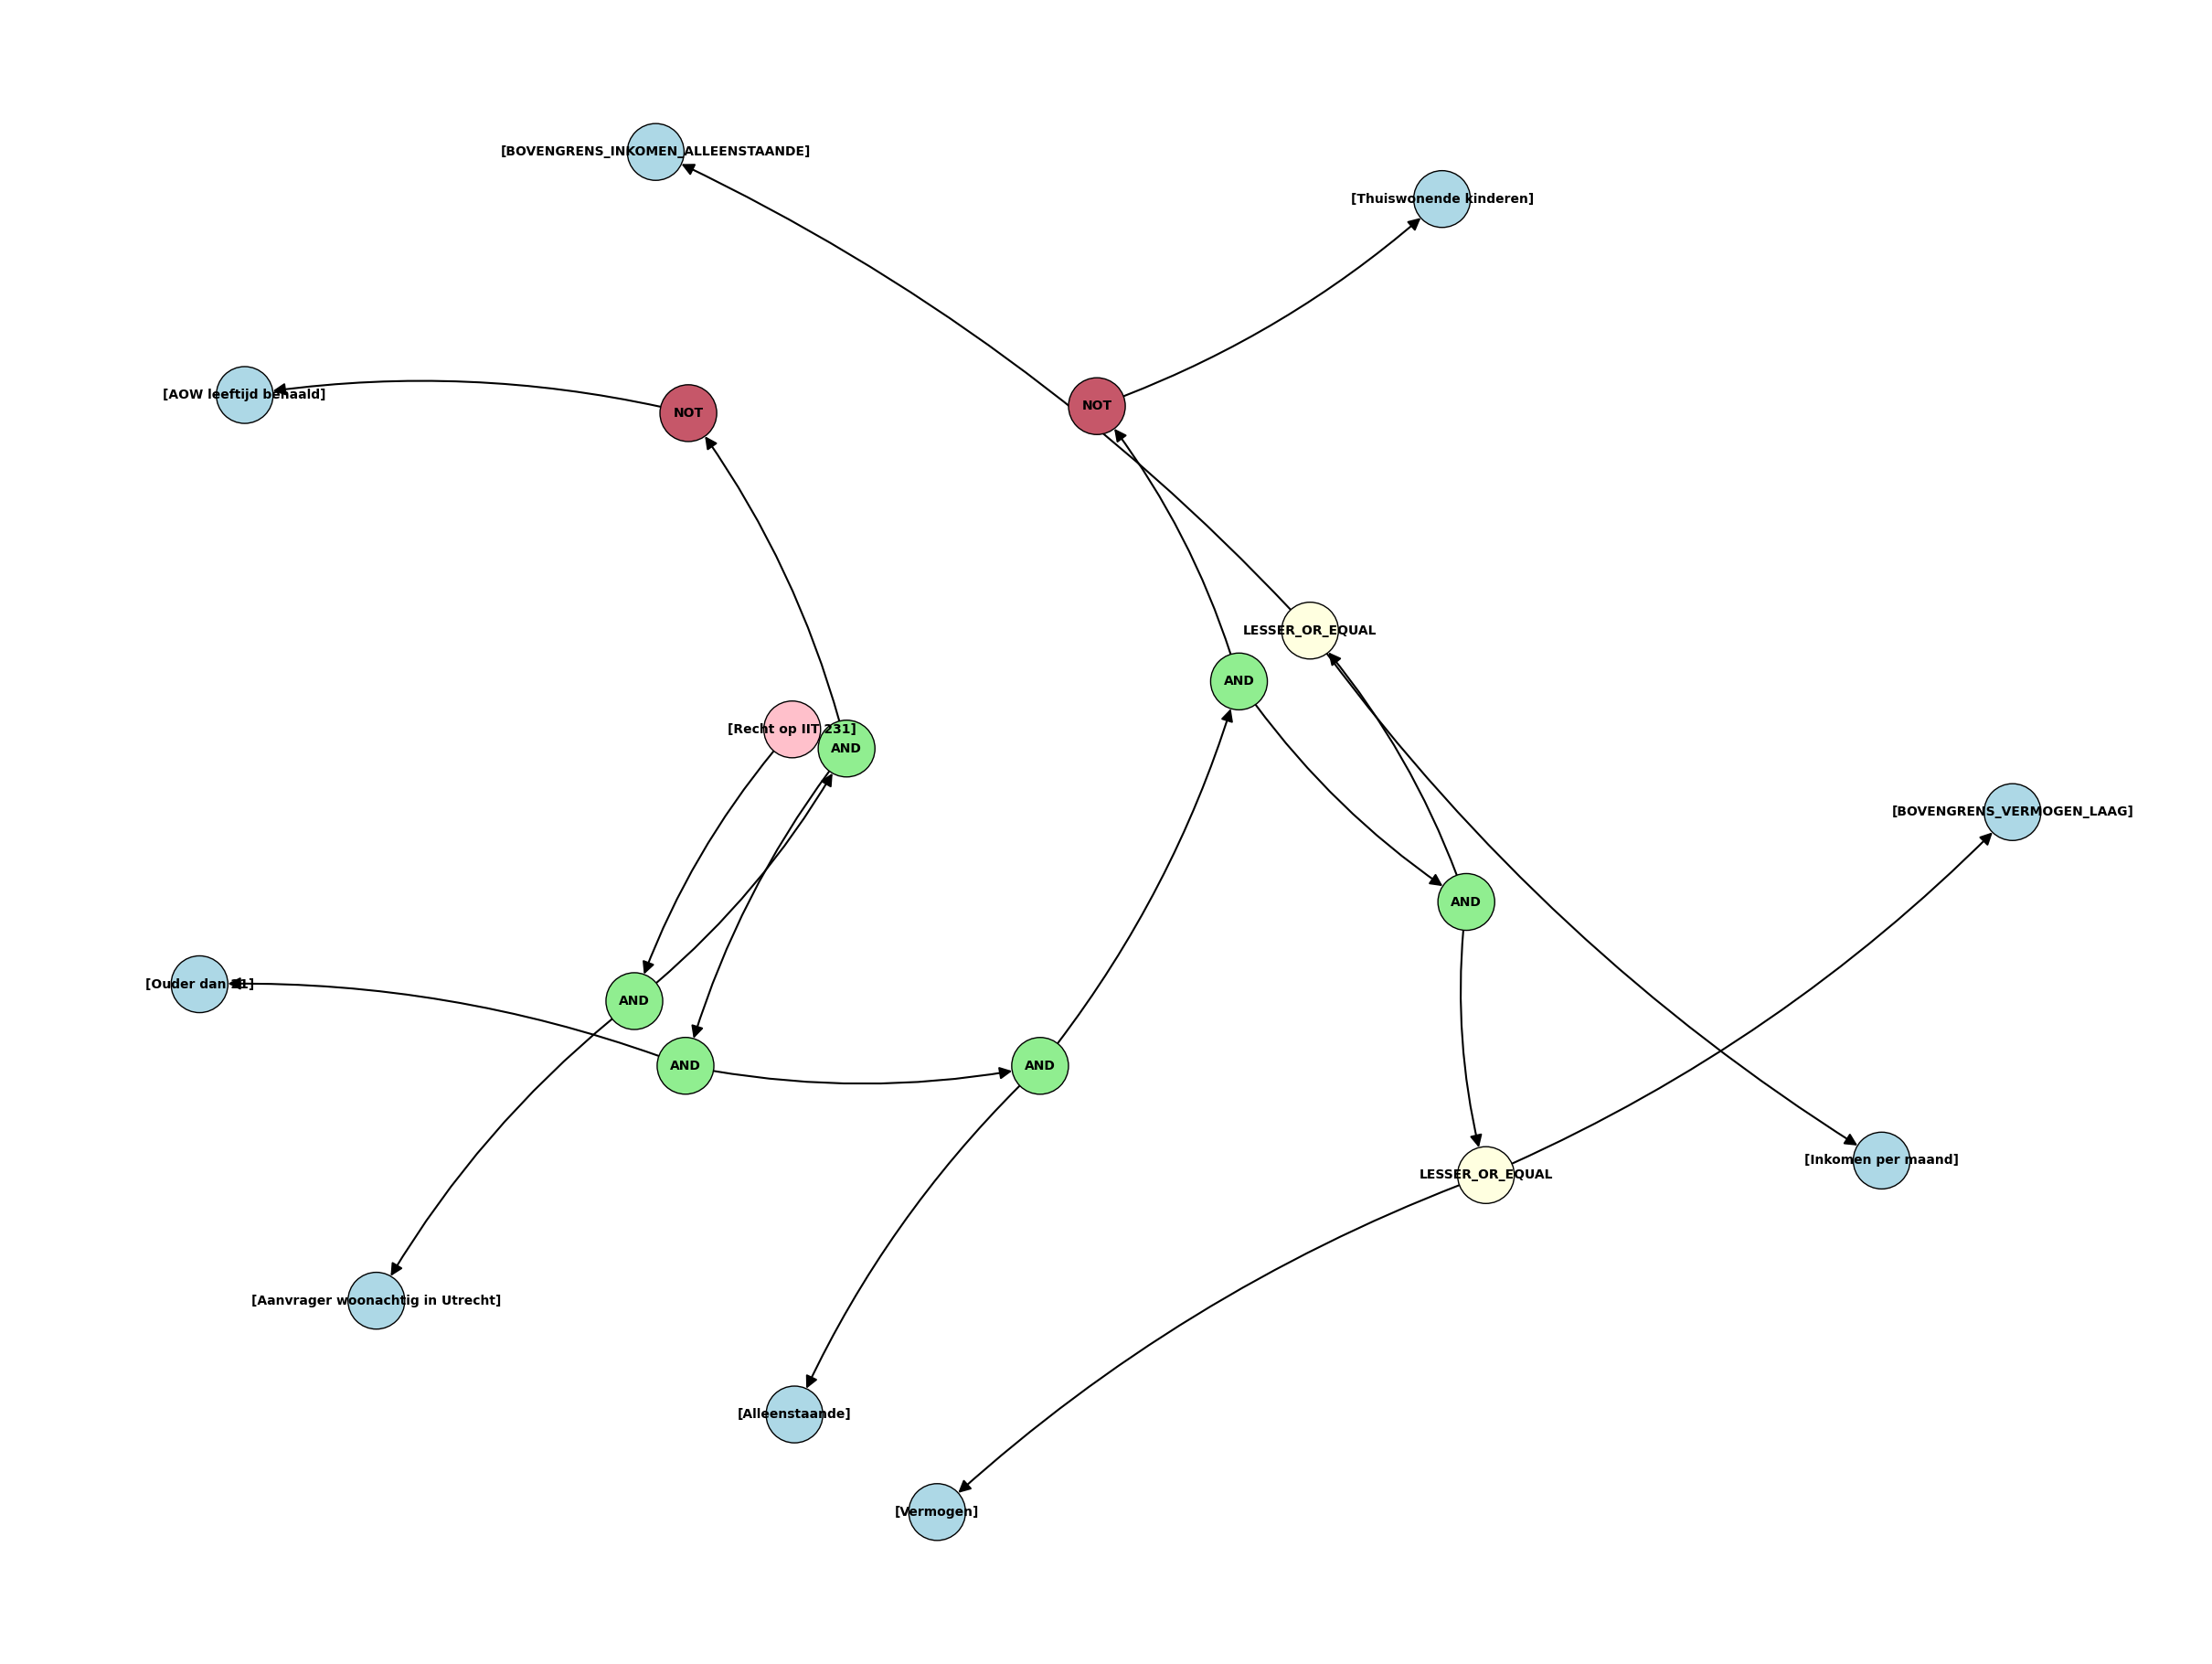

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [3]:
node_name_to_node = create_graph(type_res)
node_to_type_map = get_node_to_type_map(type_res)
visualize_graph(node_name_to_node["[Recht op IIT 231]"])

In [4]:
dsl_content = root_to_liveql(node_name_to_node["[Recht op IIT 231]"], node_to_type_map)
print(dsl_content)

form Recht_op_IIT_231Form {
	"Is the actor Aanvrager woonachtig in Utrecht?" Aanvrager_woonachtig_in_Utrecht: bool
	"Is the actor not Aanvrager woonachtig in Utrecht?" not_Aanvrager_woonachtig_in_Utrecht: bool
	"Is the actor Alleenstaande?" Alleenstaande: bool
	"Is the actor not Alleenstaande?" not_Alleenstaande: bool
	"Is the actor Ouder dan 21?" Ouder_dan_21: bool
	"Is the actor not Ouder dan 21?" not_Ouder_dan_21: bool
	"Is the actor Thuiswonende kinderen?" Thuiswonende_kinderen: bool
	"Is the actor not Thuiswonende kinderen?" not_Thuiswonende_kinderen: bool
	"Is the actor AOW leeftijd behaald?" AOW_leeftijd_behaald: bool
	"Is the actor not AOW leeftijd behaald?" not_AOW_leeftijd_behaald: bool
	"How many Inkomen per maand does the actor have?" Inkomen_per_maand: int
	"How many Vermogen does the actor have?" Vermogen: int
	if (Aanvrager_woonachtig_in_Utrecht && AOW_leeftijd_behaald && Ouder_dan_21 && Alleenstaande && Thuiswonende_kinderen && Inkomen_per_maand <= BOVENGRENS_INKOMEN_AL

In [6]:
save_dsl_to_file(dsl_content, "income supplement", "/Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql")
open_liveql()

DSL saved to /Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql
+(0, answerable("Is the actor Aanvrager woonachtig in Utrecht?", Aanvrager_woonachtig_in_Utrecht, boolean))
+(0, answerable("Is the actor not Aanvrager woonachtig in Utrecht?", not_Aanvrager_woonachtig_in_Utrecht, boolean))
+(0, answerable("Is the actor Alleenstaande?", Alleenstaande, boolean))
+(0, answerable("Is the actor not Alleenstaande?", not_Alleenstaande, boolean))
+(0, answerable("Is the actor Ouder dan 21?", Ouder_dan_21, boolean))
+(0, answerable("Is the actor not Ouder dan 21?", not_Ouder_dan_21, boolean))
+(0, answerable("Is the actor Thuiswonende kinderen?", Thuiswonende_kinderen, boolean))
+(0, answerable("Is the actor not Thuiswonende kinderen?", not_Thuiswonende_kinderen, boolean))
+(0, answerable("Is the actor AOW leeftijd behaald?", AOW_leeftijd_behaald, boolean))
+(0, answerable("Is the actor not AOW leeftijd behaald?", not_AOW_leeftijd_behaald, boolean))
+(0, answerable("How many 